### VARMA Model - Climate change time series analysis and forecasting

In [1]:
# utilities
from utilities import *
import pandas as pd 
import numpy as np
import datetime
import random
from datetime import datetime as dt
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
from math import sqrt

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # autocorrelation plot

# model
from statsmodels.tsa.stattools import grangercausalitytests #for causality check
from statsmodels.tsa.stattools import adfuller #for stationarity check
from statsmodels.stats.stattools import durbin_watson #for autocorrelation check
from statsmodels.tsa.vector_ar.var_model import VAR

# evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Importing datasets

In [2]:
# co2 = pd.read_csv('co2-avg_montly.csv') #('co2.csv')

# no_raindays = pd.read_csv('rainfall-monthly-number-of-rain-days.csv')
# no_raindays.rename(columns={'month':'Date'},inplace=True)

# sea_level = pd.read_csv('avg_sea_level.csv') #('sea_level.csv')
# sea_level.rename(columns = {'Time':'Date'},inplace=True)

# humidity = pd.read_csv('relative-humidity-monthly-mean.csv')
# humidity.rename(columns = {'month':'Date'},inplace=True)

# rainfall = pd.read_csv('rainfall-monthly-total.csv')
# rainfall.rename(columns = {'month':'Date'},inplace=True)

# temperature = pd.read_csv('surface-air-temperature-monthly-mean.csv')
# temperature.rename(columns = {'month':'Date'},inplace=True)

# anomaly_temperature = pd.read_csv('anomalies_temp.csv') #('anomalies_temperature.csv')

# co2_cols = ['Decimal Date','Trend']
# co2 = co2.drop(co2_cols,axis=1)

# sea_cols = ['Uncertanty']
# sea_level = sea_level.drop(sea_cols,axis=1)


# anomaly_temperature.drop(anomaly_temperature[anomaly_temperature['Source'] == 'GCAG'].index, inplace = True)
# anomaly_cols = ['Source']
# anomaly_temperature = anomaly_temperature.drop(anomaly_cols,axis=1)

Append new data to: co2, sea_level,anomaly_temperature in order to have data until the 2021.

First thing is to create a new list of dates then create the values of the measurement according to the values in the dataframe.

Change datatype of the column with the date into the datetime format 'YYYY-mm'

In [3]:
# co2['Date'] = pd.to_datetime(co2['Date'], format = '%Y-%m')
# co2['Date'] = co2['Date'].dt.strftime('%Y-%m')

# sea_level['Date'] = pd.to_datetime(sea_level['Date'], format = '%Y-%m')
# sea_level['Date'] = sea_level['Date'].dt.strftime('%Y-%m')

# humidity['Date'] = pd.to_datetime(humidity['Date'], format = '%Y-%m')
# humidity['Date'] = humidity['Date'].dt.strftime('%Y-%m')

# rainfall['Date'] = pd.to_datetime(humidity['Date'], format = '%Y-%m')
# rainfall['Date'] = rainfall['Date'].dt.strftime('%Y-%m')

# temperature['Date'] = pd.to_datetime(temperature['Date'], format = '%Y-%m')
# temperature['Date'] = temperature['Date'].dt.strftime('%Y-%m')

# anomaly_temperature['Date'] = pd.to_datetime(anomaly_temperature['Date'], format = '%Y-%m')
# anomaly_temperature['Date'] = anomaly_temperature['Date'].dt.strftime('%Y-%m')

Now that the dataframes are modified and the cols have the same name and format, i can merge them on the Date and build a unique dataframe.

In [4]:
# climate_change = no_raindays.merge(rainfall,on='Date').merge(humidity,on='Date').merge(temperature,on='Date').merge(co2,on='Date').merge(sea_level,on='Date').merge(anomaly_temperature,on='Date')
# climate_change.tail()

,Date,no_of_rainy_days,total_rainfall,relative_humidity,surface_temp,co2,GMSL(Global Mean Sea Level),Anomalies_Land_Ocean_Temperature
379,2013-08,15,165.6,79.0,27.9,393.04,71.6,0.66
380,2013-09,19,257.0,81.3,27.5,393.01,68.8,0.78
381,2013-10,19,285.4,79.9,27.7,394.30,66.4,0.69
382,2013-11,22,292.4,84.6,27.1,395.75,59.7,0.81
383,2013-12,21,348.2,85.8,26.5,396.65,58.5,0.67


In [5]:
# # change the column values from percentage to decimal 
# climate_change['relative_humidity'] = climate_change['relative_humidity'].apply(lambda x: x / 100)
# #save the dataframe to csv
# climate_change.to_csv('climate_change2013.csv',index=False)

In [2]:
climate_change = pd.read_csv('climate_change2013.csv')

In [3]:
#check there are no missing values
climate_change.isna().sum()

Date                                0
no_of_rainy_days                    0
total_rainfall                      0
relative_humidity                   0
surface_temp                        0
co2                                 0
GMSL(Global Mean Sea Level)         0
Anomalies_Land_Ocean_Temperature    0
dtype: int64

In [4]:
climate_change.tail()

,Date,no_of_rainy_days,total_rainfall,relative_humidity,surface_temp,co2,GMSL(Global Mean Sea Level),Anomalies_Land_Ocean_Temperature
379,2013-08,15,165.6,0.790,27.9,393.04,71.6,0.66
380,2013-09,19,257.0,0.813,27.5,393.01,68.8,0.78
381,2013-10,19,285.4,0.799,27.7,394.30,66.4,0.69
382,2013-11,22,292.4,0.846,27.1,395.75,59.7,0.81
383,2013-12,21,348.2,0.858,26.5,396.65,58.5,0.67


## DATA VISUALIZATION

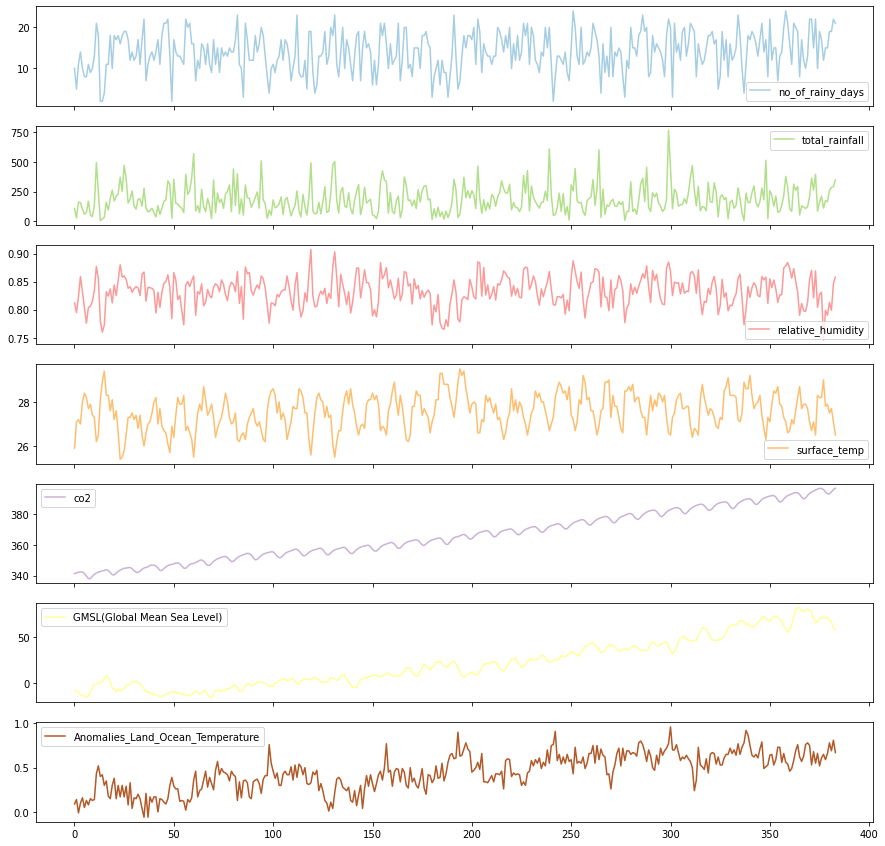

In [5]:
df = climate_change.drop('Date',axis=1)
df.plot(subplots=True, figsize=(15,15),colormap='Paired');

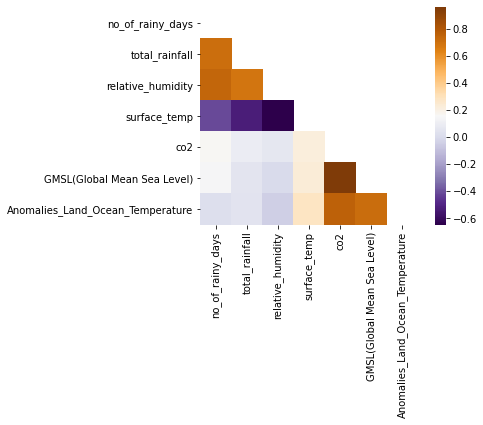

In [6]:
correlation(climate_change)

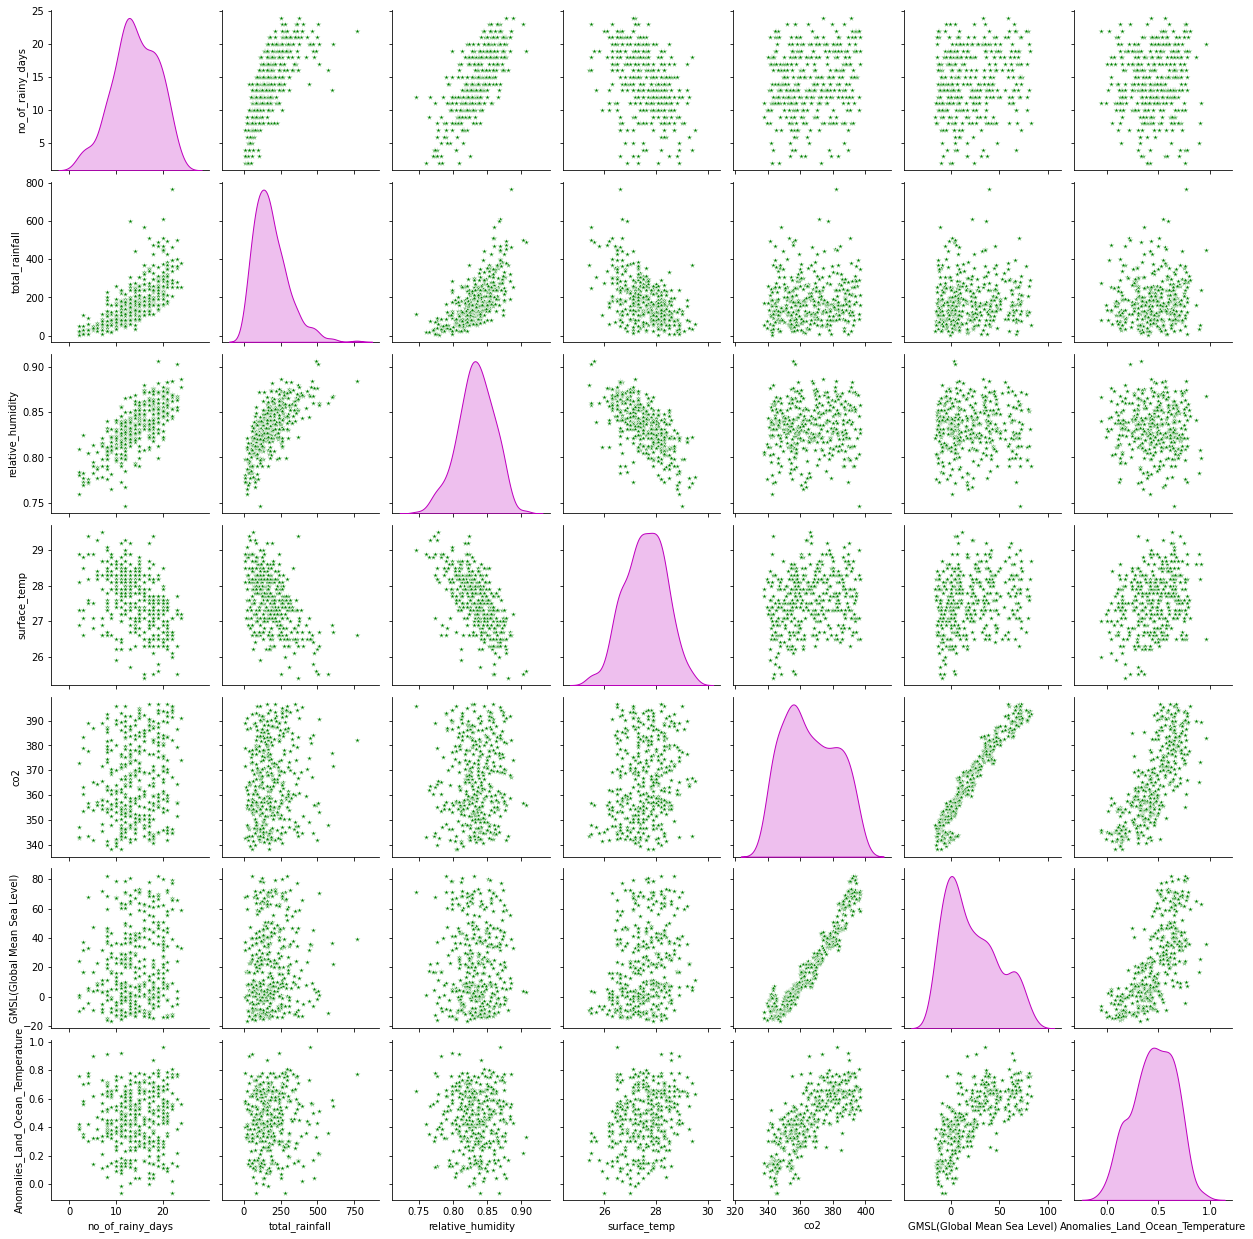

<Figure size 432x288 with 0 Axes>

In [7]:
data = pd.read_csv('climate_change2013.csv')
pair_plot(data);

-------------------------------------------------------------------------------------

## Autocorellation - Partial autocorrelation - Lag scatter plot - analysis 

Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It's conceptually similar to the correlation between two different time series, but autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods. It measures the relationship between a variable’s current value and its past values.

A value close to zero suggests a weak autocorrelation, whereas a value closer to -1 or 1 indicates a strong autocorrelation. An autocorrelation of +1 represents a perfect positive correlation; on the other hand, an autocorrelation of -1 represents a perfect negative correlation (an increase seen in one time series results in a proportionate decrease in the other time series).

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

In the surface temperature plot we can see a strong sing of seasonality given by the 'waves', but only for this variable, hence i will not split the data into seasonal data. 

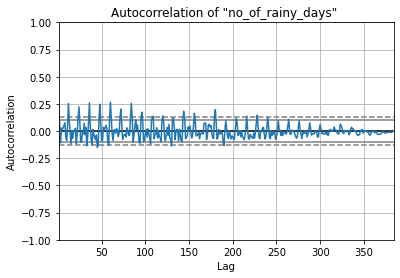

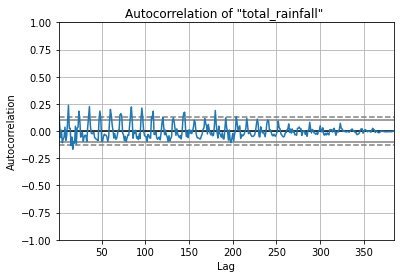

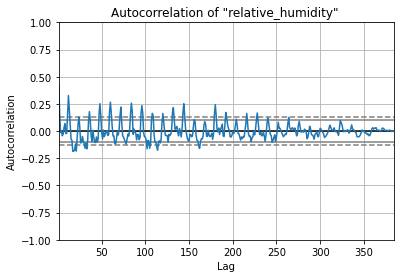

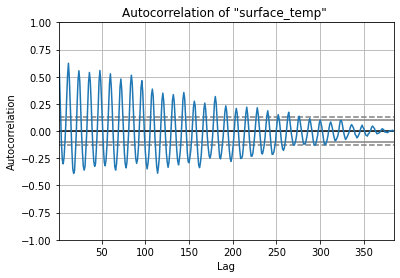

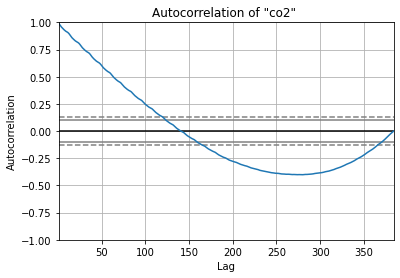

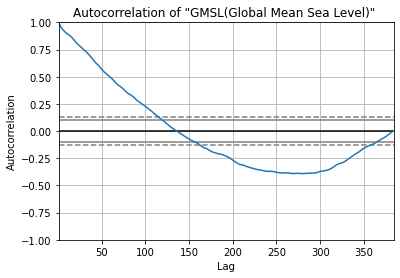

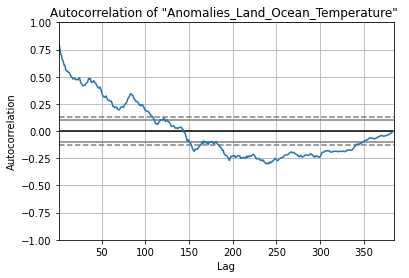

In [8]:
plot_autocorrelation(climate_change)

How correlated are the values of the measurements this month is to ones of a year ago? To reply to this question i have to look to the lag 12.

It can been notice that for the variables relative humidity, co2, GMSL and anomalies temperature there is a positive autocorrelation. That means that an increase seen in one time series leads to a proportionate increase in the other time series. So the values are highly correlated.

Always taking into account a year as a time period (lag 12 - lag 24), also the total rain fall and the surface temperature are positevly correlated. All the values inside the shaded area aren't statistically significant.

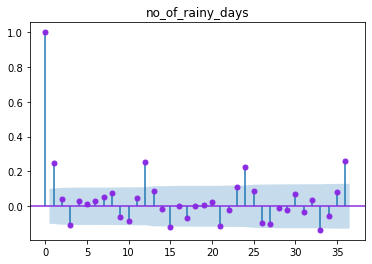

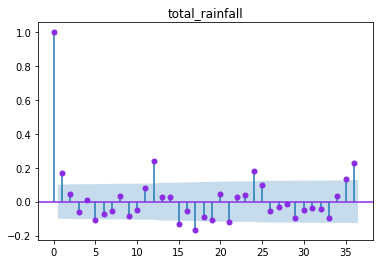

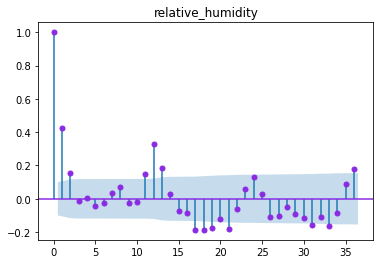

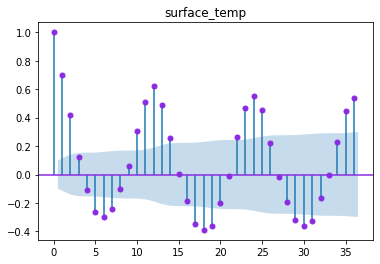

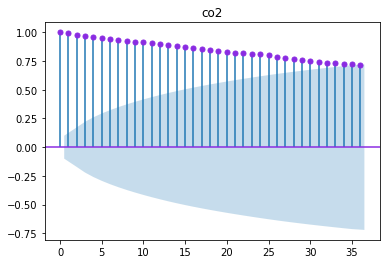

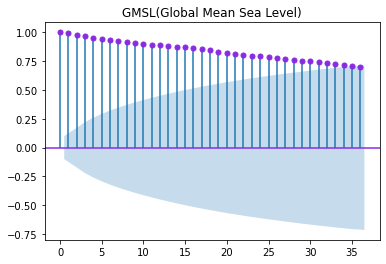

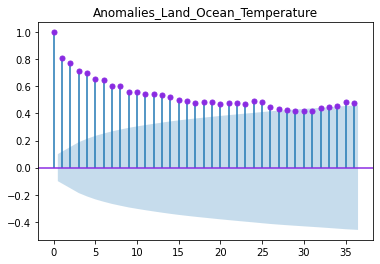

In [9]:
acf(climate_change)

**Lag scatter plot**

- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a *positive correlation* relationship;

- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a *negative correlation relationship*.

- More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

- A ball in the middle or a spread across the plot suggests a weak or no relationship.

For the surface temperature and the humidity there is a positive but weak correlation relationship, for the co2, GMSL there is a positive and strong correlation relationship whereas for the total rainfall and the anomalies temperature (in the last observation) seems that there is no correlation relationship.

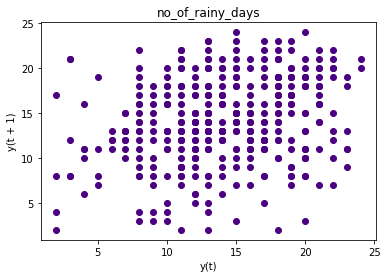

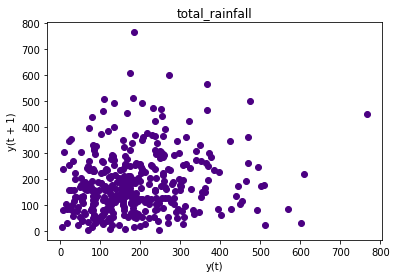

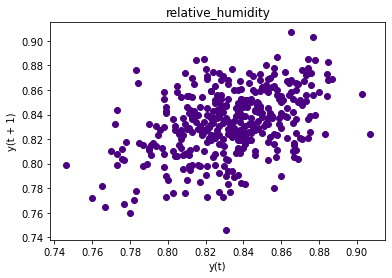

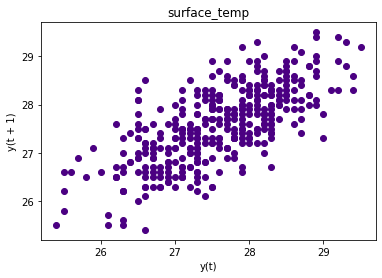

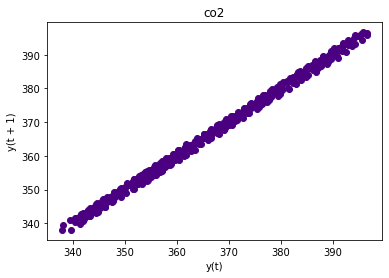

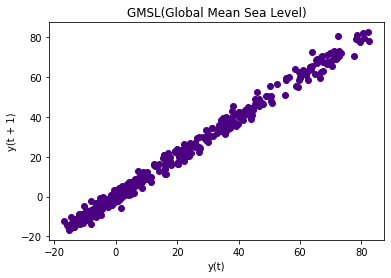

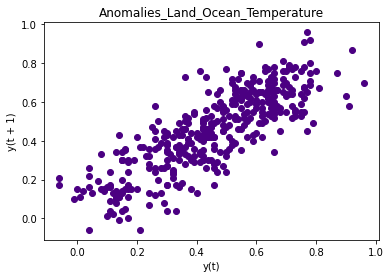

In [10]:
lag_plot(climate_change)

**Partial autocorrelation**

It does the same as regular autocorrelation but only the direct effect is shown, and all intermediary effects are removed. From these plots we can notice that the direct relationship between the present and the past of some measurements is a bit weaker, as we can see in the GMSL plot, and becames negative in the case of co2.

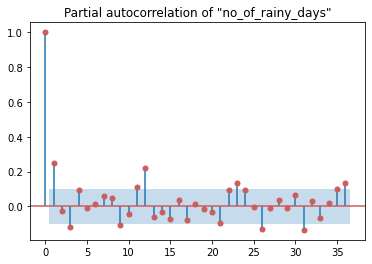

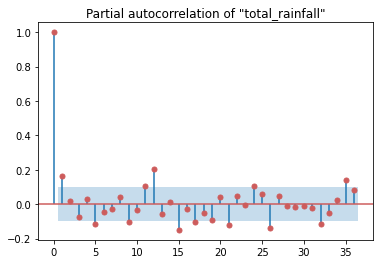

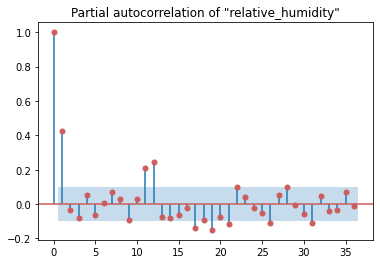

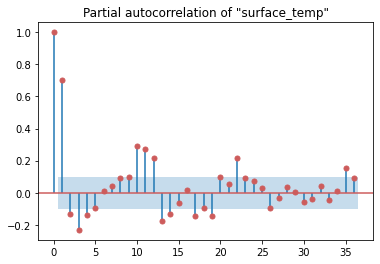

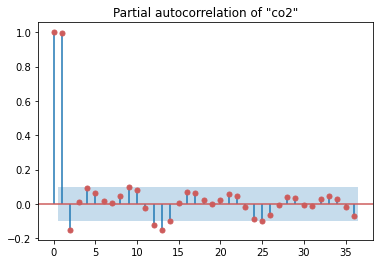

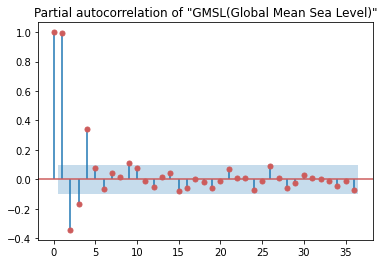

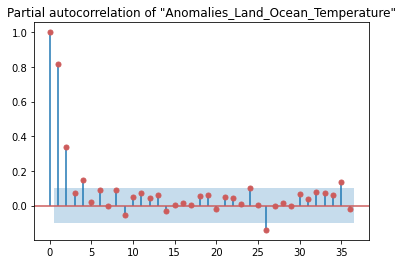

In [11]:
pacf(climate_change)

--------------------------------------------------------------
## VAR (Vector Auto Regression for multivariate time series forecasting)

For the VAR model, we have multiple time series variables that influence each other and here it is modelled as a system of equations with one equation per time series variable. Each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. 

Assuming to have only 2 variables (to simplify the example - in my case there are 7 variables - ) $Y_1$ and $Y_2$ and i want to forecast the values of these variables at time (t). To compute $Y_{1(t)}$ VAR will use the past values of both $Y_1$ and $Y_2$, likewise to compute $Y_2$ the past values of both $Y_1$ and $Y_2$ are used.

The equation for VAR(P) is:

![image](C:/Users/Stefania/Desktop/Sapienza/I SEMESTRE_21-22/SMOS/Monthly/VAR_Eq.png)

It is considered as an Autoregressive model because, each variable (Time Series) is modeled as a function of the past values, that is the predictors are nothing but the lags (time delayed value) of the series. So how is VAR different from other Autoregressive models like AR, ARMA or ARIMA? The primary difference is those models are uni-directional, (where the predictors influence the Y and not vice-versa), whereas, Vector Auto Regression (VAR) is bi-directional: the variables influence each other.

Steps:

 1) Causality investigation

 2) Test for stationary
      
     2a) Differenciating (if needed)

 3) Test for autocorrelation

 4) Model 

 5) Prediction
 
 6) Evaluation


In [12]:
''' 1. CAUSALITY INVESTIGATION 
The Granger Causality Test is used to investigate causality of data: 
check if a particular variable comes before another in the time series.
The Null Hypothesis of the Granger Causality Test is that lagged x-values do not explain the variation 
in y (so the x does not cause y).
The critical value used is 5% and if the p-value of a pair of variables is smaller than the
significance level, then the Null Hypothesis (that the coefficients of the corresponding past values 
is 0, that is, the X does not cause Y) can be rejected.
In the output the rows are the response variable and the columns are the predictors
'''

climate_change = pd.read_csv('climate_change2013.csv', index_col='Date')
grangers_causation_matrix(climate_change, variables = climate_change.columns)   

,no_of_rainy_days_x,total_rainfall_x,relative_humidity_x,surface_temp_x,co2_x,GMSL(Global Mean Sea Level)_x,Anomalies_Land_Ocean_Temperature_x
no_of_rainy_days_y,1.0000,0.0029,0.0005,0.0000,0.0,0.0034,0.0062
total_rainfall_y,0.0000,1.0000,0.0003,0.0000,0.0,0.1713,0.3389
relative_humidity_y,0.0001,0.1472,1.0000,0.0000,0.0,0.1274,0.0133
surface_temp_y,0.0000,0.0002,0.0000,1.0000,0.0,0.0206,0.0000
co2_y,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000
GMSL(Global Mean Sea Level)_y,0.0137,0.0065,0.0142,0.1065,0.0,1.0000,0.0033
Anomalies_Land_Ocean_Temperature_y,0.0303,0.0120,0.0048,0.0000,0.0,0.0000,1.0000


Let's analyze the result obtained. For most of the variables, since the p-values are < 0.05, i can reject the null hypothesis and use them for the VARMA model. 

But for some variables i can't reject the null hypothesis, in fact the p-values for:
- (GMSL_x,total_rainfall_y) - (GMSL_x,relative_humidity_y) - (GMSL_x,surface_temp_y) 

- (Anomalies_Land_Ocean_Temperature_x,total_rainfall_y)

- (co2_x,GMSL(Global Mean Sea Level)_y)

are bigger than 0.05. That means that the **GMSL doesn't cause the total rainfall, the relative humidity and the surface temperature**, as well as the **Anomalies_Land_Ocean_Temperature doesn't cause the total rainfall** and the **co2 doesn't cause the mean sea level**. 

*As it can be notice, this analysis makes sense since - for example - it's reasonable that the total rainfall causes the surface temperature, the humidity and the anomalies in the temperature; just as it would have made less sense if the co2 emissions causes the Sea Level - but for sure it causes the surface temperature.*

In the end I can state that, exept for the GMSL and the others two pairs listed before, the other variables are interchangeably causing each other. 

For now on i will not include the GMSL in the model.

In [13]:
#CLIMATE DATA WITHOUT GMSL
data_cc = climate_change.drop(['GMSL(Global Mean Sea Level)'],axis=1)

In [14]:
''' 2. STATIONARITY TEST
VectorARMA requires time series to be stationary(mean and variance does not change over time), 
to test it i use the ADF Test.
'''
for name, column in data_cc.iteritems():
    adfuller_test(column, name=column.name)

 no_of_rainy_days : P-Value = 0.002 => Stationary
 total_rainfall : P-Value = 0.0 => Stationary
 relative_humidity : P-Value = 0.0 => Stationary
 surface_temp : P-Value = 0.005 => Stationary
 co2 : P-Value = 0.999 => Non-stationary
 Anomalies_Land_Ocean_Temperature : P-Value = 0.05 => Stationary


Since for the co2 test fails, i need to make the data stationary eliminating the trend and seasonality by differencing.
Differencing reduces the length of the series by 1 and since all the time series has to be of the same length, i apply the diff() method to all the series.

This will lead to a  transformation of the series into a new time series, which we use to remove the series dependence on time and stabilize the mean of the time series, so trend and seasonality are reduced during this transformation:
$$Y_t= Y_t – Y_{t-1}; Y_t= Value with time $$

In [15]:
# Train-test splitting
n_obs = 12 #forecast on the next 12 observation (12 months = one year)
train,test =  data_cc[0:-n_obs], data_cc[-n_obs:]

In [16]:
data_differenced = train.diff().dropna() #diffence the train data
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)

 no_of_rainy_days : P-Value = 0.0 => Stationary
 total_rainfall : P-Value = 0.0 => Stationary
 relative_humidity : P-Value = 0.0 => Stationary
 surface_temp : P-Value = 0.0 => Stationary
 co2 : P-Value = 0.001 => Stationary
 Anomalies_Land_Ocean_Temperature : P-Value = 0.0 => Stationary


**Stationarity plot**

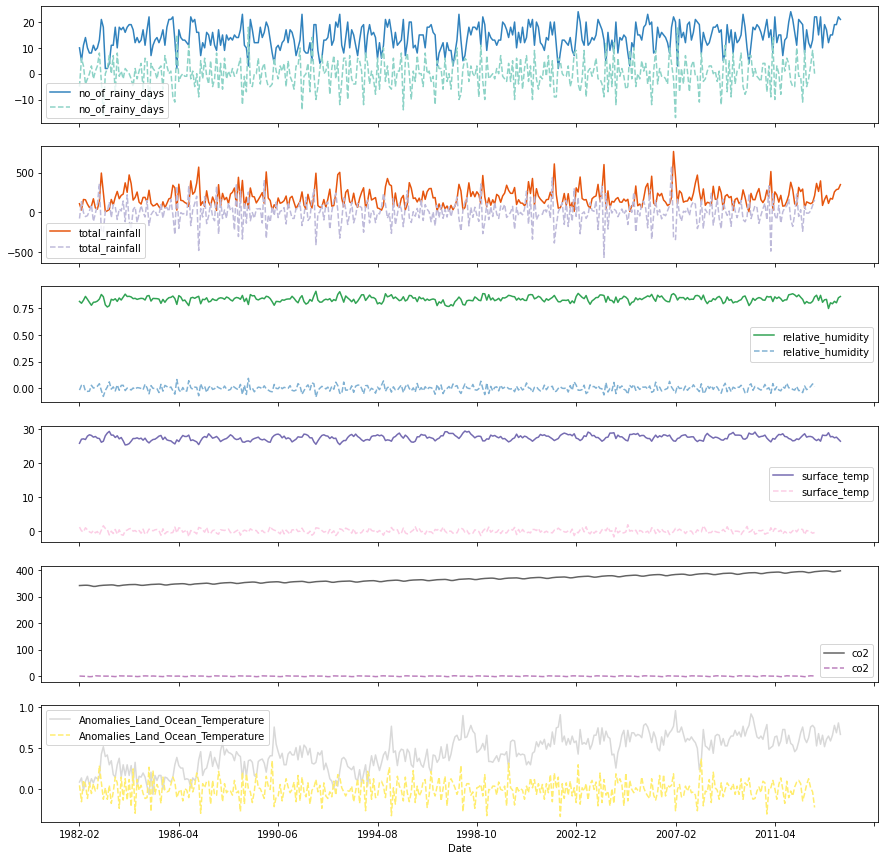

In [17]:
before_df = df.drop('GMSL(Global Mean Sea Level)',axis=1)
before = before_df.plot(subplots=True, figsize=(15,15),colormap='tab20c');
data_differenced.plot(subplots=True,linestyle="--", ax=before, colormap='Set3');

In [18]:
# To find the optimal values of p I will perform the model.select_order() method that highlight
# with a * the lowest AIC value.
model = VAR(data_differenced)
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,-1.227,-1.161,0.2931,-1.201
1,-2.938,-2.477,0.05295,-2.755
2,-4.552,-3.694,0.01055,-4.210
3,-5.850,-4.596,0.002883,-5.351
4,-6.487,-4.837*,0.001526,-5.830
5,-6.698,-4.652,0.001237,-5.884
6,-6.833,-4.391,0.001083,-5.861
7,-7.024,-4.186,0.0008967,-5.895
8,-7.216,-3.982,0.0007428,-5.929*
9,-7.245,-3.616,0.0007246,-5.801


As the value of the P increases model becomes more complex and the AIC penalizes the complex model.

As can be seen from the result, the AIC begins to drop as i fit the more complex model (around 10) but, after a certain amount of time AIC begins to increase again (from 12). It’s because AIC is punishing these models for being too complex.

The VAR(p=12) returns the lowest score and after that again AIC starts increasing, hence i will build the VAR model of order 12. 

In [19]:
# train the VAR model of selected order (p=12)
p=12
model_fitted = model.fit(p) 
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Jan, 2022
Time:                     19:02:05
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -2.75152
Nobs:                     359.000    HQIC:                  -5.60533
Log likelihood:          -1274.05    FPE:                0.000578601
AIC:                     -7.48939    Det(Omega_mle):     0.000190565
--------------------------------------------------------------------
Results for equation no_of_rainy_days
                                          coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------
const                                       -1.631683         0.762943           -2.139           0.032
L1.no_of_rainy_days                         -0.895620        

## Interpret the results:

Each table in the result is related to one feature treating it as the variable of interest.  

In each table is used as possible regressor every lag from 1 to 12 for all the 7 features. We should consider the regressor with the smallest p-value

Then, at last, there is a confusion matrix that shows the correlation between the variables. In the results, we found that the correlation between no_of_rainy_days and (total_rainfall, total_humidity) is high, *instead we can notice that the surface temperature is negativly correlated with the total_rainfall, total_humidity and no_of_rainy_days*. 

If i would focus my interest in the search term **surface temperature** over time versus the search terms: 
- CO2, 
- number of rainy days, 
- total rainfall, 
- relative humidity, 
- global mean sea level,
- anomalies in land and ocean temperature. 

And then predict the surface temperature time series using the time series of all the other features listed above, according to the results obtained, i should use the following equation:

$\hat{s}_t = -0.54 s_{t-1} + 0.66 a_{t-1} - 0.1r_{t-2} - 0.47 s_{t-2} + 0.85 a_{t-2} - 0.15 r_{t-3} + 7.42 h_{t-3} + 1.04 a_{t-3} - 0.46 s_{t-4} + 0.97 a_{t-4} + 0.93 a_{t-5} - 0.35 s_{t-6} + 0.86 a_{t-8} - 0.19 s_{t-9} + 0.56 a_{t-9} - 0.04 r_{t-11}$

where $a_{t-1}$ means lag 1 of anomalies temp, $s_{t-2}$ means lag 2 of sea level, $r_{t-11}$ means total rainfall at lag 11 and so on.

#### Durbin-Watson Statistic 

Use this test to check the autocorrelation. The result of this test will be a value in range [0.0,4.0]. A value of 2.0 means that there is no auto-correlation detected in the sample. Values less than 2 indicate positive auto-correlation and values from 2 indicate negative auto-correlation. A rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal. Any value outside this range could be a cause for concern.

In [20]:
out = durbin_watson(model_fitted.resid)
for col,val in zip (data_differenced.columns,out):
    print((col),':',round(val,2))

no_of_rainy_days : 1.96
total_rainfall : 1.98
relative_humidity : 1.99
surface_temp : 1.99
co2 : 2.0
Anomalies_Land_Ocean_Temperature : 1.92


From the results obtained I can state that there is no autocorrelation, since all values are < 2 hence i can procede with the forecasting

### PREDICTION

In order to forecast, the VAR model expects up to the lag order number of observations from the past data since the terms in the VAR model are essentially the lags of the various time series in the dataset.

In [21]:
lag = model_fitted.k_ar #12

# input data for forecasting
lagged_Values = data_differenced.values[-lag:] # specify the 'initial value' for the forecast

# Forecast
pred = model_fitted.forecast(y= lagged_Values,steps= n_obs) 
df_pred = (pd.DataFrame(pred, index=test.index, columns=test.columns + '_pred'))
df_pred

,no_of_rainy_days_pred,total_rainfall_pred,relative_humidity_pred,surface_temp_pred,co2_pred,Anomalies_Land_Ocean_Temperature_pred
Date,,,,,,
2013-01,-10.122505,-161.523466,-0.037866,0.384303,0.424396,0.097815
2013-02,-3.274189,-122.583129,-0.024820,0.494448,0.242852,-0.005892
2013-03,8.503867,105.944168,0.032917,-0.039334,0.203497,0.010911
2013-04,1.893042,79.002324,0.010138,0.523910,0.279838,-0.031243
2013-05,-1.807682,-81.752208,-0.013679,0.243314,0.075168,0.049433
2013-06,-2.784336,-69.148047,-0.019493,-0.026821,-0.909735,-0.084652
2013-07,1.829846,49.402894,0.005762,-0.677168,-1.817074,0.008732
2013-08,-1.224456,2.932714,-0.003696,-0.190737,-1.147327,-0.029218
2013-09,-1.221252,-58.975699,-0.006245,0.141140,0.623904,0.064081


### Invert the tranformation

Recall that the forecasted value is a first-order difference, so to get it similar to original data i have to 'roll back' each difference by taking the most recent values of the original series’ training data and adding it to a cumulative sum of forecasted values (first determine the cumulative sum at index and then add it to the base number).

In [22]:
result = invert_transformation(train, df_pred)

### Plot the results

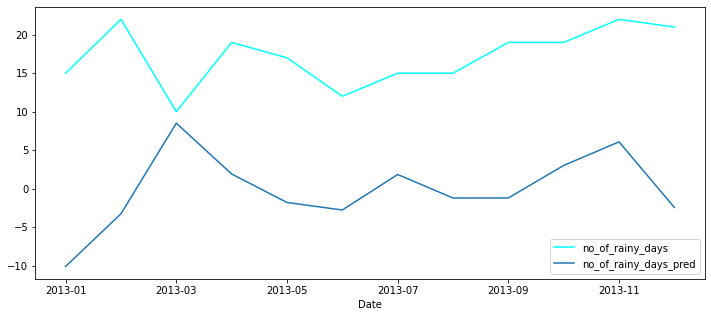

In [23]:
test_or = data_cc[-n_obs:]
test_or['no_of_rainy_days'].plot(figsize=(12,5),legend=True,color='cyan');
result['no_of_rainy_days_pred'].plot(legend=True);

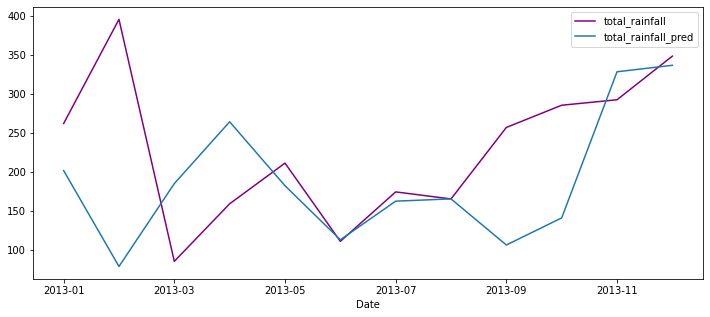

In [24]:
test_or['total_rainfall'].plot(figsize=(12,5),legend=True,color = 'purple');
result['total_rainfall_pred'].plot(legend=True);

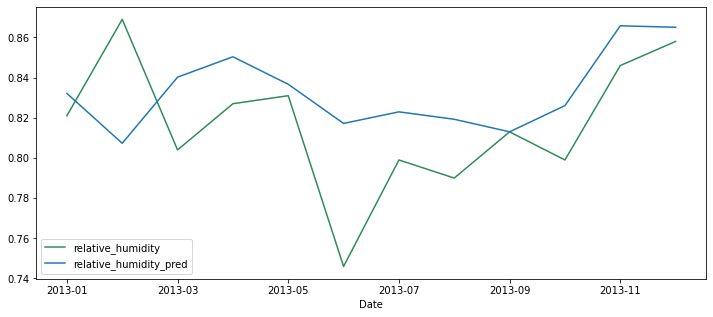

In [25]:
test_or['relative_humidity'].plot(figsize=(12,5),legend=True,color = 'seagreen');
result['relative_humidity_pred'].plot(legend=True);

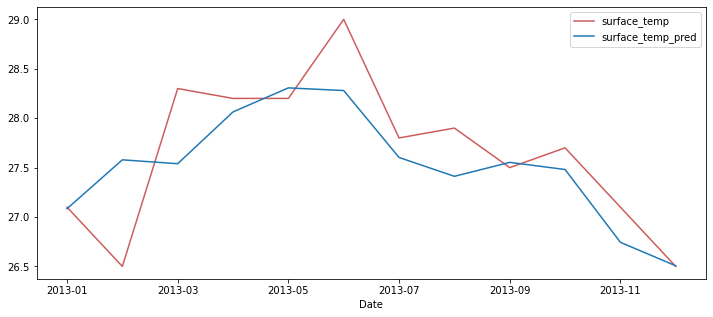

In [26]:
test_or['surface_temp'].plot(figsize=(12,5),legend=True,color = 'indianred');
result['surface_temp_pred'].plot(legend=True);

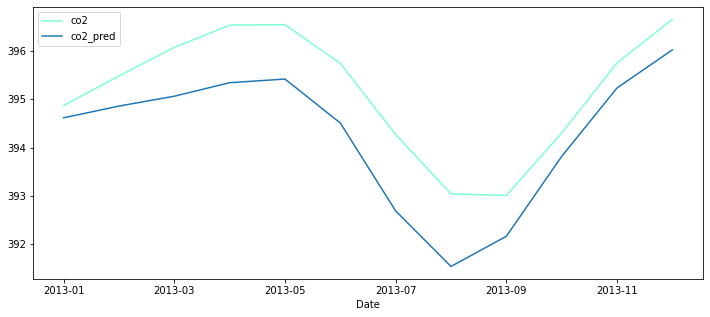

In [27]:
test_or['co2'].plot(figsize=(12,5),legend=True,color = 'aquamarine');
result['co2_pred'].plot(legend=True);

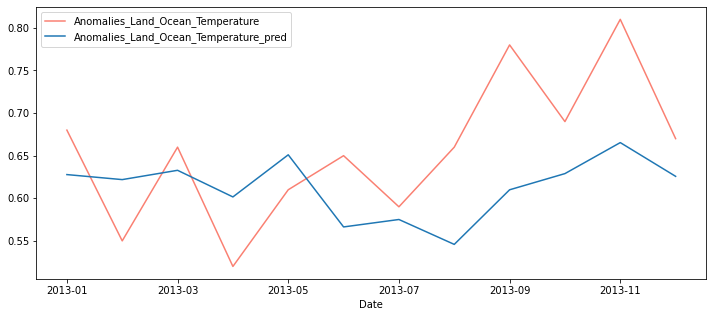

In [28]:
test_or['Anomalies_Land_Ocean_Temperature'].plot(figsize=(12,5),legend=True,color = 'salmon');
result['Anomalies_Land_Ocean_Temperature_pred'].plot(legend=True);

### Evaluate the forecast

In [29]:
for p,t in zip(result.columns,test.columns):
    combine = pd.concat([result[p], test[t]], axis=1)
    print(f'{p}')
    print(f'RMSE : ', round(sqrt(mean_squared_error(combine[t].values, combine[p].values)),3))
    print(f'MAE :',round(np.mean(np.abs(combine[t].values, combine[p].values)),3))
    #print(f'Correlation coeff: ',np.corrcoef(combine[t].values, combine[p].values)[0,1])
    print('--------------------')
    print()

no_of_rainy_days_pred
RMSE :  18.353
MAE : 17.167
--------------------

total_rainfall_pred
RMSE :  119.033
MAE : 229.033
--------------------

relative_humidity_pred
RMSE :  0.034
MAE : 0.817
--------------------

surface_temp_pred
RMSE :  0.478
MAE : 27.65
--------------------

co2_pred
RMSE :  1.001
MAE : 395.188
--------------------

Anomalies_Land_Ocean_Temperature_pred
RMSE :  0.088
MAE : 0.656
--------------------



**Interpret the results**:

The **MAE** indicates the distances between the predicted values and the actual one. We can notice that this model gets **low MAE and low RMSE for the relative humidity**, instead very **high MAE and RMSE for the total_rainfall_pred**. 

Instead for some values like the surface_temp the RMSE is low but the MAE is higher.

This suggests that the model fitted works very good only for some values and not for all of them. 

## GENERATE FUTURE FORECAST

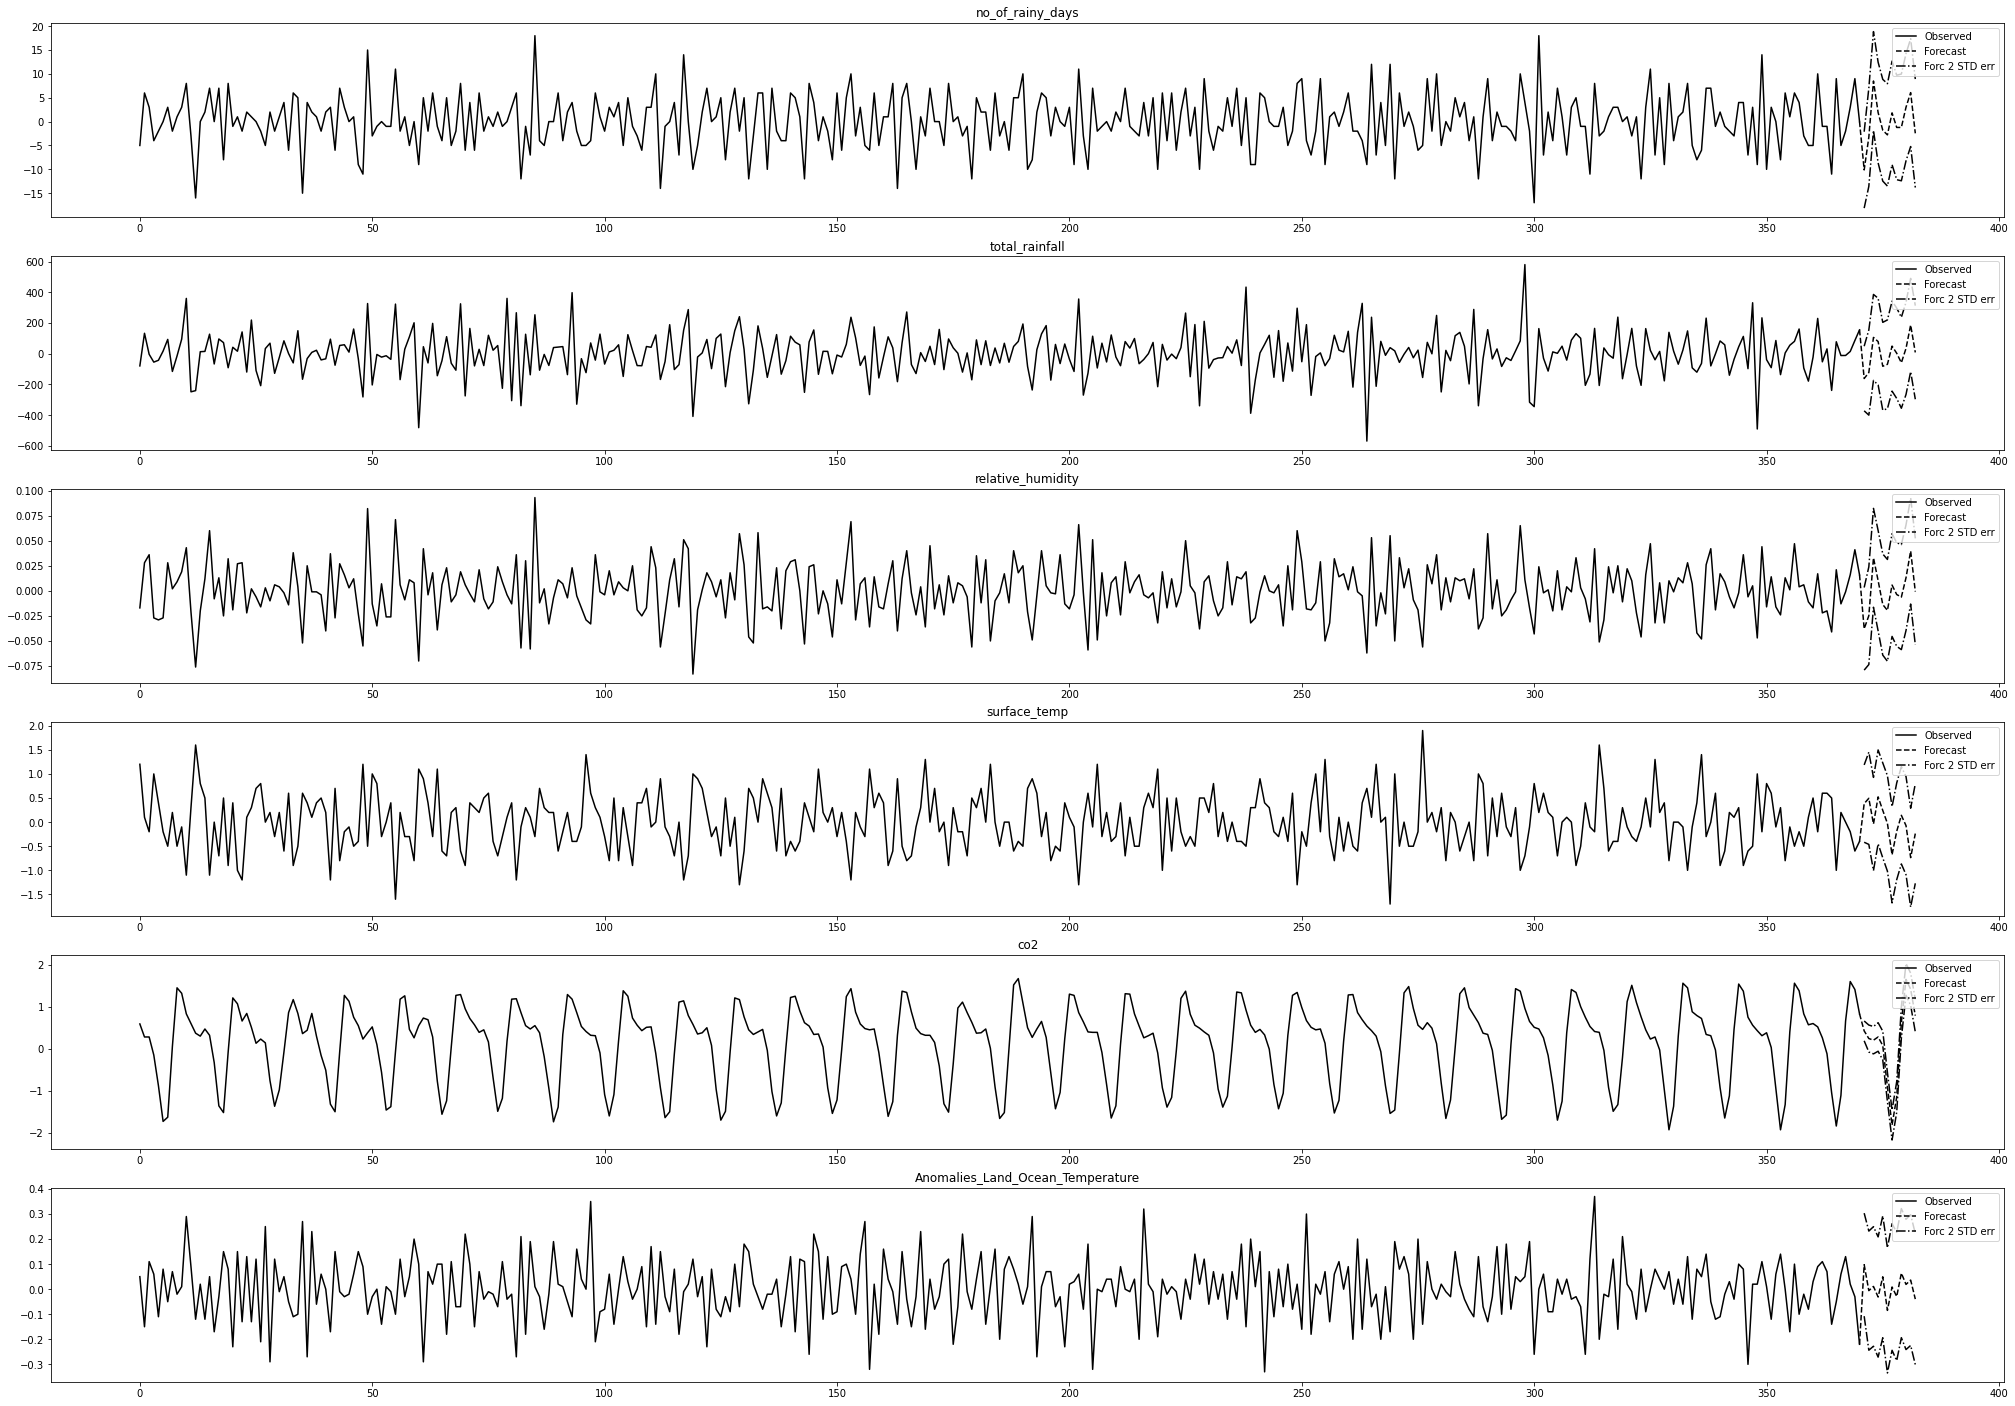

In [30]:
fig = model_fitted.plot_forecast(12)
fig.set_figheight(25)
fig.set_figwidth(35)